In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importation du data set et sélection des données

In [2]:
# importation des données

raw_datas = pd.read_csv("en.openfoodfacts.org.products.csv", 
                       sep = "\t", 
                       low_memory=False
                       )


In [3]:
# on ne garde que les colonnes qui nous intéressent

columns = ["saturated-fat_100g", "sugars_100g", "salt_100g", "nutrition-score-fr_100g", "nutriscore_grade"]
datas = raw_datas[columns]

In [4]:
# visualisation

datas

,saturated-fat_100g,sugars_100g,salt_100g,nutrition-score-fr_100g,nutriscore_grade
0,3.08,15.0,1.40,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,2.20,22.0,4.60,18.0,d
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1424196,NaN,NaN,NaN,NaN,NaN
1424197,1.00,1.0,1.00,NaN,NaN
1424198,NaN,NaN,NaN,NaN,NaN
1424199,0.00,0.6,0.64,NaN,NaN


# Nettoyage des données

In [5]:
# suppression de toutes les lignes avec des données manquantes

datas.dropna(inplace=True)

<ipython-input-5-e19ba7f0c308>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas.dropna(inplace=True)


In [6]:
# visualisation

datas

,saturated-fat_100g,sugars_100g,salt_100g,nutrition-score-fr_100g,nutriscore_grade
3,2.2,22.0,4.60,18.0,d
13,0.1,3.9,0.42,1.0,b
21,15.5,21.9,0.10,14.0,d
30,0.0,27.0,0.00,-2.0,a
34,1.0,1.0,0.27,1.0,b
...,...,...,...,...,...
1424188,17.0,18.0,0.19,17.0,d
1424189,0.0,0.0,0.00,0.0,b
1424193,6.0,10.4,1.10,15.0,d
1424194,4.8,24.0,0.28,12.0,d


In [7]:
# suppression des doublons

datas.drop_duplicates(inplace=True)

<ipython-input-7-97c1d4284eba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas.drop_duplicates(inplace=True)


In [8]:
# visualisation

datas

,saturated-fat_100g,sugars_100g,salt_100g,nutrition-score-fr_100g,nutriscore_grade
3,2.2,22.0,4.60,18.0,d
13,0.1,3.9,0.42,1.0,b
21,15.5,21.9,0.10,14.0,d
30,0.0,27.0,0.00,-2.0,a
34,1.0,1.0,0.27,1.0,b
...,...,...,...,...,...
1424157,3.5,5.5,1.23,11.0,d
1424164,28.2,26.9,0.03,22.0,e
1424186,4.3,14.0,0.08,7.0,c
1424193,6.0,10.4,1.10,15.0,d


In [9]:
# suppression des observation ou au moins l'un des composants à une valeur supérieure à 100

def non_aberrant(line) :
    return (max(line[["saturated-fat_100g", "sugars_100g", "salt_100g"]].values) < 100)

datas = datas[datas.apply(non_aberrant, axis="columns")][columns]

In [10]:
# visualisation

datas

,saturated-fat_100g,sugars_100g,salt_100g,nutrition-score-fr_100g,nutriscore_grade
3,2.2,22.0,4.60,18.0,d
13,0.1,3.9,0.42,1.0,b
21,15.5,21.9,0.10,14.0,d
30,0.0,27.0,0.00,-2.0,a
34,1.0,1.0,0.27,1.0,b
...,...,...,...,...,...
1424157,3.5,5.5,1.23,11.0,d
1424164,28.2,26.9,0.03,22.0,e
1424186,4.3,14.0,0.08,7.0,c
1424193,6.0,10.4,1.10,15.0,d


# Etudes univariées

count    345732.000000
mean          9.831743
std           8.877862
min         -15.000000
25%           2.000000
50%          11.000000
75%          17.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64


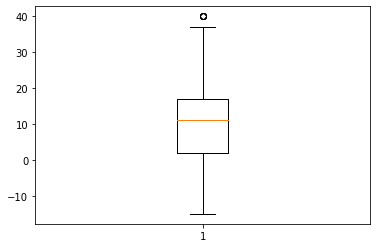

/home/samuel/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='Density'>

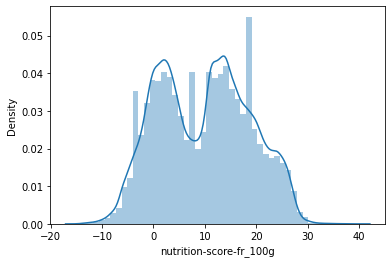

In [11]:
# étude de la cible

target = datas["nutrition-score-fr_100g"]

print(target.describe())

plt.boxplot(target)
plt.show()

import seaborn as sns

sns.distplot(a = target, kde=True)

count    345732.000000
mean          5.331196
std           7.370743
min           0.000000
25%           0.350000
50%           2.500000
75%           7.580000
max          99.900000
Name: saturated-fat_100g, dtype: float64


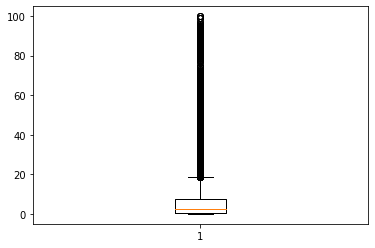

/home/samuel/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='saturated-fat_100g', ylabel='Density'>

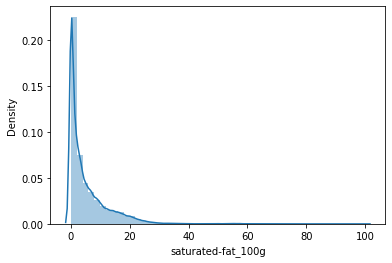

In [12]:
# étude de la variable graisse saturée

sat_fat = datas["saturated-fat_100g"]

print(sat_fat.describe())

plt.boxplot(sat_fat)
plt.show()

sns.distplot(a = sat_fat, kde=True)

count    345732.000000
mean         14.150614
std          17.910221
min          -1.000000
25%           1.400000
50%           5.000000
75%          22.950000
max          99.950000
Name: sugars_100g, dtype: float64


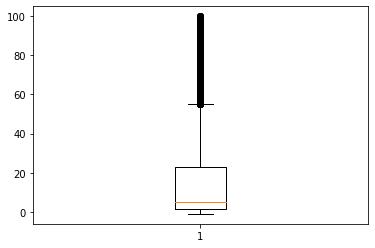

/home/samuel/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sugars_100g', ylabel='Density'>

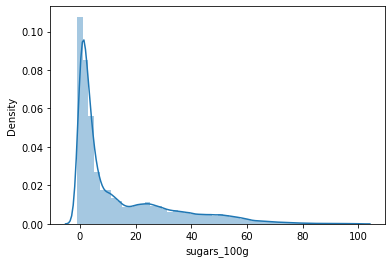

In [13]:
# étude de la variable sucre

sugar = datas["sugars_100g"]

print(sugar.describe())

plt.boxplot(sugar)
plt.show()

sns.distplot(a = sugar, kde=True)

count    345732.000000
mean          1.178328
std           3.170747
min           0.000000
25%           0.130000
50%           0.670000
75%           1.300000
max          99.900000
Name: salt_100g, dtype: float64


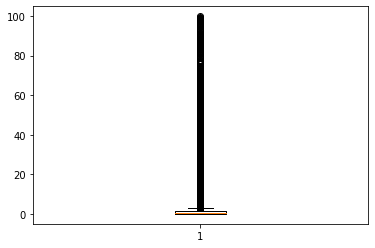

/home/samuel/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salt_100g', ylabel='Density'>

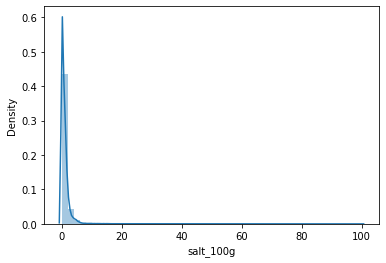

In [14]:
# étude de la variable sel

salt = datas["salt_100g"]

print(salt.describe())

plt.boxplot(salt)
plt.show()

sns.distplot(a = salt, kde=True)

In [15]:
# synthèse des stats

datas.describe(include="all")

,saturated-fat_100g,sugars_100g,salt_100g,nutrition-score-fr_100g,nutriscore_grade
count,345732.000000,345732.000000,345732.000000,345732.000000,345732
unique,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,d
freq,NaN,NaN,NaN,NaN,106974
mean,5.331196,14.150614,1.178328,9.831743,NaN
std,7.370743,17.910221,3.170747,8.877862,NaN
min,0.000000,-1.000000,0.000000,-15.000000,NaN
25%,0.350000,1.400000,0.130000,2.000000,NaN
50%,2.500000,5.000000,0.670000,11.000000,NaN
75%,7.580000,22.950000,1.300000,17.000000,NaN


/home/samuel/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/samuel/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/samuel/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

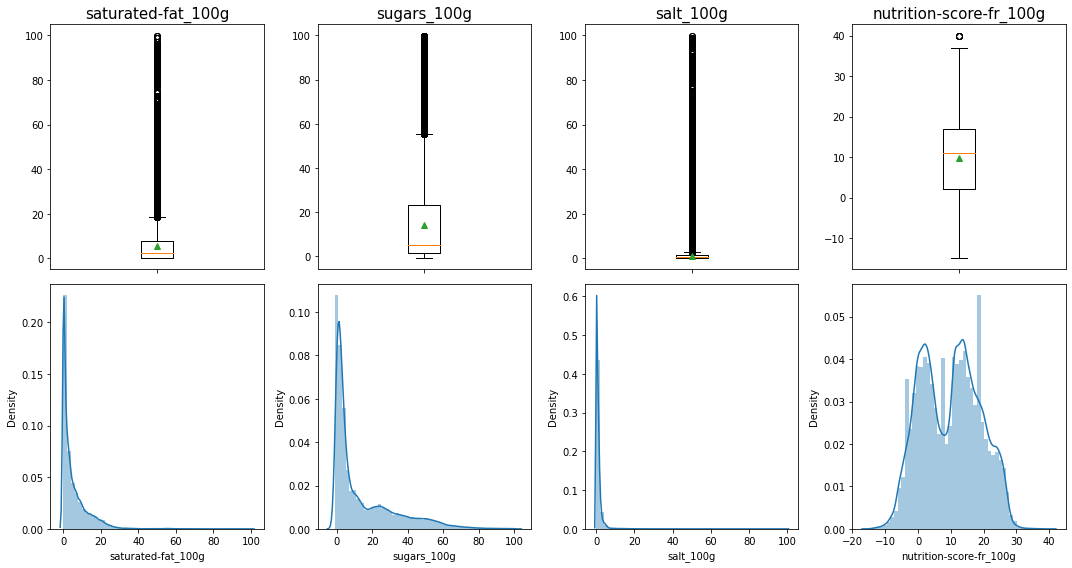

In [16]:
# synthèse des diagrammes

fig, axes = plt.subplots(2, 4, figsize=(15,8))
axes = axes.ravel()


for i, col in enumerate(datas.columns[:-1]):
    ax = axes[i]
    ax.boxplot(datas[col], showmeans=True)
    ax.set_xticklabels([""])
    ax.set_title(col, fontsize=15)

for i, col in enumerate(datas.columns[:-1]):
    ax = axes[i+4]
    sns.distplot(a=datas[col], ax=ax)

fig.tight_layout()
plt.savefig("synthese.png")
plt.show()


# Entrainement et performance du modèle

In [17]:
# entrainement de la random forest

from sklearn import model_selection, ensemble

X = datas[["saturated-fat_100g", "sugars_100g", "salt_100g"]]
y = datas["nutrition-score-fr_100g"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

rdf = ensemble.RandomForestRegressor()

rdf.fit(X_train, y_train)
rdf.score(X_test, y_test)

0.8434138126917299

In [18]:
# constitution d'un exemple unique (confit de canard)

example = np.array([6.3, 0.6, 1.4]).reshape(1,-1)

In [19]:
%%time

# mesure du temps de prédiction d'un exemple

rdf.predict(example)

CPU times: user 6.02 ms, sys: 157 µs, total: 6.18 ms
Wall time: 5.73 ms


array([14.12833333])

# Relation entre le score numérique et le score alphabétique

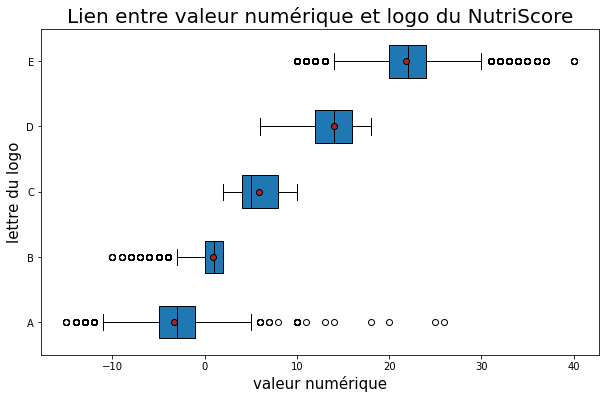

In [20]:
# affichage des diagrammes en boîte

quali = "nutriscore_grade" 
quanti = "nutrition-score-fr_100g" 


modalites = datas[quali].unique()
modalites.sort()
groupes = []
for m in modalites:
    groupes.append(datas.loc[datas[quali]==m, quanti])
    
groupes = np.array(groupes, dtype=object)
modalites = [m.upper() for m in modalites]

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title("Lien entre valeur numérique et logo du NutriScore", fontsize=20)
ax.set_xlabel("valeur numérique", fontsize=15)
ax.set_ylabel("lettre du logo", fontsize=15)

ax.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.savefig("lien_valeur_lettre.png", bbox_inches="tight")
plt.show()

On s'attendait à des valeurs bien séparées par modalité or il y a des chevauchement.  

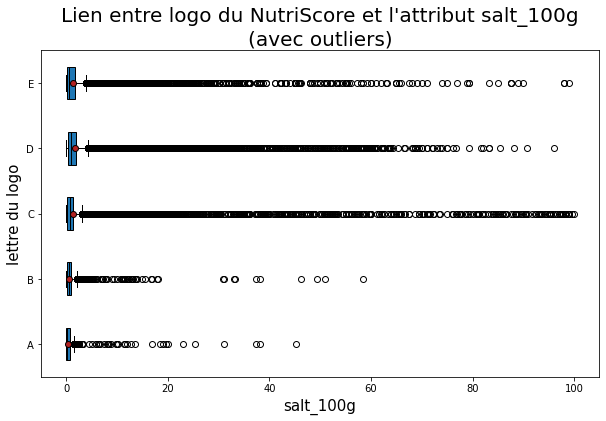

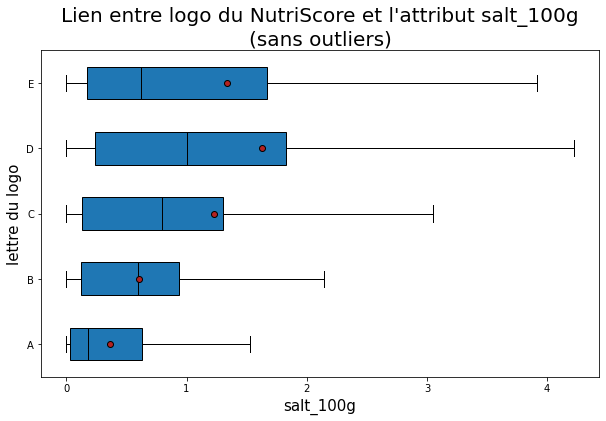

In [21]:
# ANOVA entre nutriscore_grade et salt_100g 
# Représentation

quali = "nutriscore_grade" 
quanti = "salt_100g" 


modalites = datas[quali].unique()
modalites.sort()
groupes = []
for m in modalites:
    groupes.append(datas.loc[datas[quali]==m, quanti])
    
groupes = np.array(groupes, dtype=object)
modalites = [m.upper() for m in modalites]

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title("Lien entre logo du NutriScore et l'attribut salt_100g\n(avec outliers)", fontsize=20)
ax.set_xlabel("salt_100g", fontsize=15)
ax.set_ylabel("lettre du logo", fontsize=15)

ax.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title("Lien entre logo du NutriScore et l'attribut salt_100g\n(sans outliers)", fontsize=20)
ax.set_xlabel("salt_100g", fontsize=15)
ax.set_ylabel("lettre du logo", fontsize=15)

ax.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

In [22]:
# ANOVA entre nutriscore_grade et salt_100g 
# calcul du eta carré

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_squared(datas[quali], datas[quanti])

0.019693774537719783

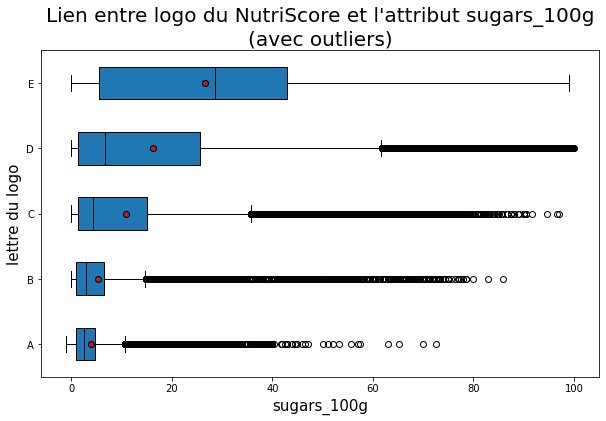

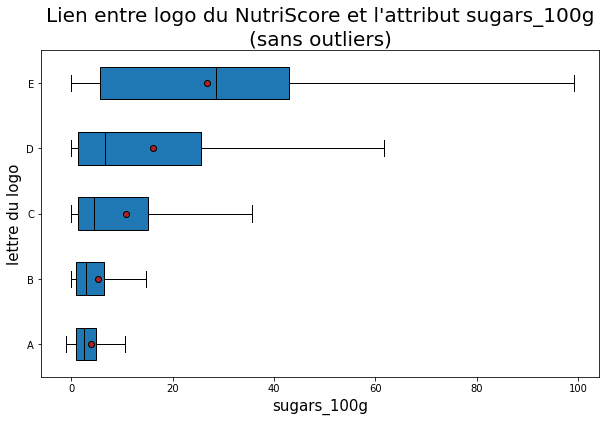

0.1875343883597437

In [23]:
# ANOVA entre nutriscore_grade et sugars_100g 

quali = "nutriscore_grade" 
quanti = "sugars_100g" 


modalites = datas[quali].unique()
modalites.sort()
groupes = []
for m in modalites:
    groupes.append(datas.loc[datas[quali]==m, quanti])
    
groupes = np.array(groupes, dtype=object)
modalites = [m.upper() for m in modalites]

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title("Lien entre logo du NutriScore et l'attribut sugars_100g\n(avec outliers)", fontsize=20)
ax.set_xlabel("sugars_100g", fontsize=15)
ax.set_ylabel("lettre du logo", fontsize=15)

ax.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title("Lien entre logo du NutriScore et l'attribut sugars_100g\n(sans outliers)", fontsize=20)
ax.set_xlabel("sugars_100g", fontsize=15)
ax.set_ylabel("lettre du logo", fontsize=15)

ax.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

eta_squared(datas[quali], datas[quanti])

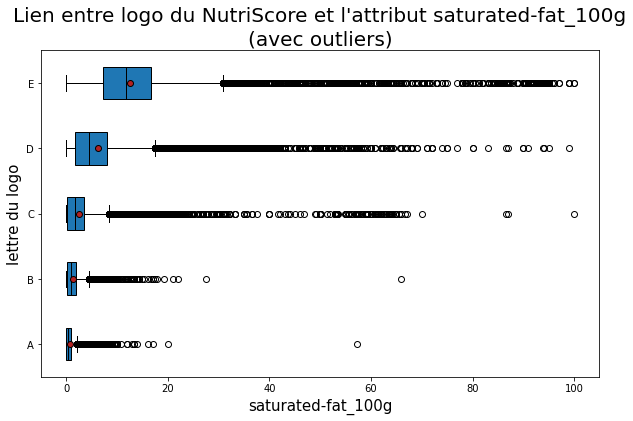

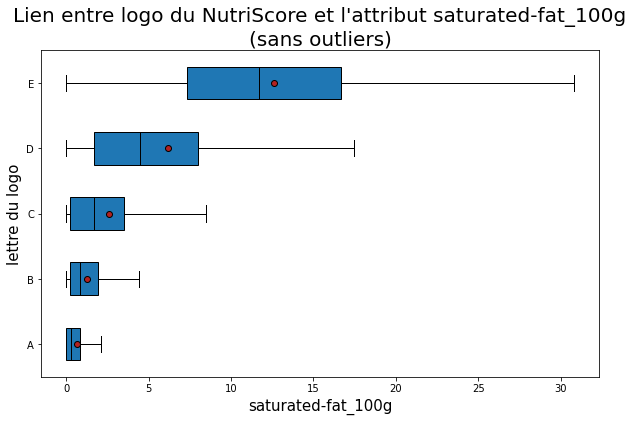

0.32950391166605586

In [24]:
# ANOVA entre nutriscore_grade et saturated-fat_100g 

quali = "nutriscore_grade" 
quanti = "saturated-fat_100g" 


modalites = datas[quali].unique()
modalites.sort()
groupes = []
for m in modalites:
    groupes.append(datas.loc[datas[quali]==m, quanti])
    
groupes = np.array(groupes, dtype=object)
modalites = [m.upper() for m in modalites]

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title("Lien entre logo du NutriScore et l'attribut saturated-fat_100g\n(avec outliers)", fontsize=20)
ax.set_xlabel("saturated-fat_100g", fontsize=15)
ax.set_ylabel("lettre du logo", fontsize=15)

ax.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title("Lien entre logo du NutriScore et l'attribut saturated-fat_100g\n(sans outliers)", fontsize=20)
ax.set_xlabel("saturated-fat_100g", fontsize=15)
ax.set_ylabel("lettre du logo", fontsize=15)

ax.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

eta_squared(datas[quali], datas[quanti])

Les corrélation du NutriScore sous forme de lettre ne sont pas fortes avec ces attributs, mais elles ne sont pas négligeables avec les attributs sugars_100g et satured-fat_100g.

In [25]:
# random forest classifier avec nutrisocre_grade comme cible avec les mêmes variables explicatives

y_class_train = datas.loc[X_train.index, "nutriscore_grade"]
y_class_test = datas.loc[X_test.index, "nutriscore_grade"]

rdc = ensemble.RandomForestClassifier()
rdc.fit(X_train, y_class_train)
rdc.score(X_test, y_class_test)

0.6689709029906866

Puisque la performance est moins bonne, j'en déduis qu'il y a des erreurs dans la saisie de la lettre du nutriscore parmi les données. Je réaffecte donc la lettre en fonction du nutriscore numérique.

In [26]:
# affectation de la bonne lettre et de la couleur en fonction du score

def affectation(ligne) :
    valeur = ligne["nutrition-score-fr_100g"]
    if valeur <= -2 :
        ligne["nutriscore_correct_grade"] = 'A'
        ligne["color"] = "#038141"
    elif valeur <= 3 :
        ligne["nutriscore_correct_grade"] = 'B'
        ligne["color"] = "#85bb2f"
    elif valeur <= 11 :
        ligne["nutriscore_correct_grade"] = 'C'
        ligne["color"] = "#fecb02"
    elif valeur <= 16 :
        ligne["nutriscore_correct_grade"] = 'D'
        ligne["color"] = "#ee8100"
    else :
        ligne["nutriscore_correct_grade"] = 'E'
        ligne["color"] = "#e63e11"
    return ligne

datas = datas.apply(affectation, axis="columns")

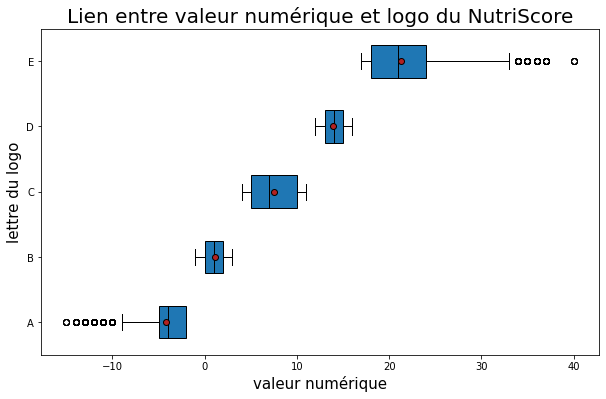

In [27]:
# affichage des diagrammes en boîte avec la bonne classe

quali = "nutriscore_correct_grade" 
quanti = "nutrition-score-fr_100g" 


modalites = datas[quali].unique()
modalites.sort()
groupes = []
for m in modalites:
    groupes.append(datas.loc[datas[quali]==m, quanti])
    
groupes = np.array(groupes, dtype=object)
modalites = [m.upper() for m in modalites]

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title("Lien entre valeur numérique et logo du NutriScore", fontsize=20)
ax.set_xlabel("valeur numérique", fontsize=15)
ax.set_ylabel("lettre du logo", fontsize=15)

ax.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.savefig("lien_valeur_lettre_rectifie.png", bbox_inches="tight")
plt.show()

In [28]:
# calcul des eta carré avec cette nouvelle répartition

eta2 = eta_squared(datas["nutriscore_correct_grade"], datas["salt_100g"])
print(f"Pour l'attribut salt_100g, eta carré = {eta2}\n")

eta2 = eta_squared(datas["nutriscore_correct_grade"], datas["sugars_100g"])
print(f"Pour l'attribut sugars_100g, eta carré = {eta2}\n")

eta2 = eta_squared(datas["nutriscore_correct_grade"], datas["saturated-fat_100g"])
print(f"Pour l'attribut saturated-fat_100g, eta carré = {eta2}\n")

Pour l'attribut salt_100g, eta carré = 0.02027300878041106

Pour l'attribut sugars_100g, eta carré = 0.1933817891530682

Pour l'attribut saturated-fat_100g, eta carré = 0.37682453720924647



On constate que les corrélations restent du même ordre mais que les valeurs de eta carré sont tout de même un peu plus grandes avec cette répartition du logo.

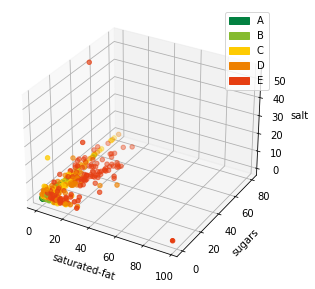

In [29]:
# visualisation nuage


data_size = datas.shape[0]
sample = np.random.randint(data_size, size=500 )
sampled_datas = datas.iloc[sample,:]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sampled_datas.loc[:,"saturated-fat_100g"], sampled_datas.loc[:,"sugars_100g"], sampled_datas.loc[:,"salt_100g"], c=sampled_datas.loc[:,"color"])
ax.set_xlabel("saturated-fat")
ax.set_ylabel("sugars")
ax.set_zlabel("salt")
fig.tight_layout()

letters = ['A', 'B', 'C', 'D', 'E']
colors = ["#038141", "#85bb2f", "#fecb02", "#ee8100", "#e63e11"]
circles = []
for color in colors :
    circles.append(mpatches.Circle((0,0), 0.1, color=color))
plt.legend(circles, letters)
                   
plt.savefig("nuage_categories.png", bbox_inches="tight")

plt.show()

In [30]:
# export des données exploitables

datas.to_csv("donnees_exploitables.csv", index=False)

In [31]:
# sauvegarde du modèle entraîné

import pickle

pickle.dump(rdf, open("random_forest_trained_model.pkl", "wb"))